In [ ]:
# Wordle AI Solver Notebook

# This notebook runs the Wordle AI logic from `main.py`.

# **Important:** This AI is designed for **5-letter words** based on the provided code and word lists.

# **Setup:** Make sure this notebook (`Test1.ipynb`) is located in the same directory as `main.py`, `words.txt`, and `wordsAllowed.txt`.

In [ ]:
## Mode 1: Automatic AI vs. Random Word

# This mode simulates the AI playing against a randomly chosen target word from `words.txt`. It uses the `test_highestFrequency` function from `main.py` (which we import as `gameEngine`).

# Change the number inside `test_highestFrequency()` to run more simulations (e.g., `test_highestFrequency(10)`).

In [ ]:
import main as gameEngine
import random

# Reload the word lists in case they were modified by other cells/runs
gameEngine.available_words = [i[:-1] for i in open("words.txt", "r").readlines()]
gameEngine.permanent_answers = [i[:-1] for i in open("words.txt", "r").readlines()]
gameEngine.wordsAllowed = [i[:-1] for i in open("wordsAllowed.txt", "r").readlines()]

print("Running 1 automatic game simulation...")
# The test_highestFrequency function already prints its results
gameEngine.test_highestFrequency(1)

print("\nSimulation complete.")

In [ ]:
# ## Mode 2: AI vs. User-Defined Word

# In this mode, you provide a specific 5-letter target word (which must be a valid potential answer from `words.txt`), and the AI will attempt to guess it.

# We'll define a helper function `solve_specific_word` based on the logic in `test_highestFrequency`.

In [ ]:
import main as gameEngine
import random
import math # Needed for isBlimp logic

# --- Ensure this function is defined either in main.py or in a cell ABOVE this one ---
def get_guess_colors(guess, target_word):
    """
    Compares a guess to the target word and returns a string representing
    Wordle colors (G=Green, Y=Yellow, B=Black/Gray).
    Handles duplicate letters correctly.
    """
    if len(guess) != 5 or len(target_word) != 5:
        return "Error" # Should not happen

    colors = [''] * 5  # Initialize with placeholders
    target_list = list(target_word) # Mutable list to track used letters

    # First pass for Greens (Exact Matches)
    for i in range(5):
        if guess[i] == target_list[i]:
            colors[i] = 'G'
            target_list[i] = None # Mark this letter as used for green

    # Second pass for Yellows (Present but Wrong Position)
    for i in range(5):
        if colors[i] == '': # Only check letters not already marked Green
            if guess[i] in target_list:
                colors[i] = 'Y'
                # Mark the *first* available instance of this letter in target as used
                target_list[target_list.index(guess[i])] = None
            else:
                # If not Green or Yellow, it must be Black/Gray
                colors[i] = 'B'

    return "".join(colors) # Return as a single string like "BGYBB"
# --- End of get_guess_colors function ---


# --- MODIFIED solve_specific_word function ---
def solve_specific_word(target_word):
    target_word = target_word.lower() # Ensure lowercase
    # --- Validation ---
    if len(target_word) != 5:
        print(f"Error: '{target_word}' is not 5 letters long.")
        return

    # Reload lists each time to ensure clean state
    # Assuming main.py is imported as gameEngine
    # --- Make sure main.py also reloads its lists if needed, or do it here ---
    gameEngine.available_words = [i[:-1] for i in open("words.txt", "r").readlines()]
    gameEngine.permanent_answers = [i[:-1] for i in open("words.txt", "r").readlines()]
    gameEngine.wordsAllowed = [i[:-1] for i in open("wordsAllowed.txt", "r").readlines()]
    initial_word_list = gameEngine.permanent_answers[:] # Use the list from gameEngine

    if target_word not in initial_word_list:
        print(f"Error: '{target_word}' is not in the list of possible answers (words.txt).")
        return

    # --- Simulation Logic ---
    available_words = initial_word_list[:]
    steps = 0
    guess_history = []

    print(f"Target Word: {target_word}")

    # --- First Guess ---
    guess = "salet"
    steps = 1
    guess_history.append(guess)
    colors = get_guess_colors(guess, target_word) # Get colors
    emoji_output = gameEngine.format_colors_to_emoji(colors) # <--- CHANGE 1: Format colors
    print(f"Guess {steps}: {guess} -> {emoji_output}") # <--- CHANGE 2: Print emojis

    if guess == target_word:
        print(f"Solved in {steps} steps!")
        print(f"History: {guess_history}")
        return

    available_words = gameEngine.filter_words(available_words, guess, target_word)
    print(f"  Remaining possible words: {len(available_words)}")
    if target_word not in available_words and len(available_words) > 0:
         print(f"Warning: Target word '{target_word}' was filtered out! List: {available_words[:10]}")

    # --- Subsequent Guesses (Loop) ---
    for j in range(5): # Max 5 more guesses
        if not available_words:
             print("Error: No possible words left in list.")
             steps = -1 # Indicate failure state
             break

        if len(available_words) == 1:
            guess = available_words[0]
        elif gameEngine.isBlimp(available_words):
            print("  (Blimp condition detected)")
            guess = gameEngine.blimpSearch(available_words)
        else:
            guess = gameEngine.getMaxValue1(available_words)

        steps += 1
        guess_history.append(guess)
        colors = get_guess_colors(guess, target_word) # Get colors
        emoji_output = gameEngine.format_colors_to_emoji(colors) # <--- CHANGE 1: Format colors
        print(f"Guess {steps}: {guess} -> {emoji_output}") # <--- CHANGE 2: Print emojis

        if guess == target_word:
            print(f"Solved in {steps} steps!")
            print(f"History: {guess_history}")
            return

        available_words = gameEngine.filter_words(available_words, guess, target_word)
        print(f"  Remaining possible words: {len(available_words)}")
        if target_word not in available_words and len(available_words) > 0:
            print(f"Warning: Target word '{target_word}' was filtered out! List: {available_words[:10]}")

    # --- End of Loop ---
    if steps != -1 and guess != target_word:
        print(f"Failed to solve in 6 steps.")
        print(f"History: {guess_history}")
        print(f"Remaining possibilities: {available_words}")

# --- Get User Input and Run ---
user_target = input("Enter the 5-letter target word (must be in words.txt): ")
solve_specific_word(user_target)

In [ ]:
## Mode 3: Human VS AI Wordle

In [ ]:
# --- Cell for Human vs AI Game Mode with Difficulty ---

import main as gameEngine # Imports your main logic file
import random
import math # Needed because main.py uses it

# You might need to re-run this cell if you modify main.py while the notebook is open
# to ensure the latest versions of the functions are loaded.

def play_human_vs_ai():
    """Plays a game of Wordle where a human competes against the AI, with difficulty setting."""

    # --- Difficulty Selection ---
    while True:
        difficulty = input("Choose difficulty (easy/hard): ").lower().strip()
        if difficulty in ['easy', 'hard']:
            break
        else:
            print("Invalid input. Please type 'easy' or 'hard'.")

    # --- Setup ---
    # Reload lists for a fresh game state directly from files
    try:
        current_permanent_answers = [i[:-1] for i in open("words.txt", "r").readlines()]
        current_words_allowed = [i[:-1] for i in open("wordsAllowed.txt", "r").readlines()]
        # Update the lists inside the imported gameEngine module as well, just in case
        gameEngine.permanent_answers = current_permanent_answers[:]
        gameEngine.wordsAllowed = current_words_allowed[:]
        gameEngine.available_words = current_permanent_answers[:] # Reset available words too
    except FileNotFoundError:
        print("Error: words.txt or wordsAllowed.txt not found in the current directory.")
        return

    if not current_permanent_answers:
        print("Error: words.txt is empty or could not be read.")
        return

    target_word = random.choice(current_permanent_answers)
    print("\n--- Human vs AI Wordle ---")
    print(f"Difficulty: {difficulty.capitalize()}")
    # print(f"(DEBUG: The word is {target_word})") # Optional: Uncomment to see the word

    human_guesses_history = []
    ai_guesses_history = []
    ai_available_words = current_permanent_answers[:] # AI maintains its own list

    # --- Game Loop (Max 6 turns each) ---
    for turn in range(1, 7):
        print(f"\n--- Turn {turn} ---")

        # --- Human Player's Turn ---
        while True:
            human_guess = input(f"Your guess ({turn}/6): ").lower()
            if len(human_guess) != 5:
                print("Guess must be 5 letters long.")
            # Check against both allowed words and potential answers for validity
            elif human_guess not in current_words_allowed and human_guess not in current_permanent_answers:
                 print(f"'{human_guess}' is not in the list of allowed words.")
            else:
                break # Valid guess

        # Use functions from the imported gameEngine
        human_colors = gameEngine.get_guess_colors(human_guess, target_word)
        human_emoji = gameEngine.format_colors_to_emoji(human_colors)
        human_guesses_history.append(f"{human_guess} -> {human_emoji}")
        print(f"Your result: {human_emoji}")

        if human_guess == target_word:
            print(f"\nCongratulations! You guessed the word '{target_word}' in {turn} turns!")
            print("Human wins! 🎉")
            return # End game

        # --- AI Player's Turn ---
        print("AI is thinking...")
        if turn == 1:
            ai_guess = "salet" # Standard first guess
        else:
            # AI needs to filter its list based on ITS *previous* guess and feedback
            if ai_guesses_history: # Ensure there was a previous AI guess to filter on
                 last_ai_guess = ai_guesses_history[-1].split(" ")[0] # Get the word part
                 # Use filter_words from gameEngine to update the AI's private list
                 ai_available_words = gameEngine.filter_words(ai_available_words[:], last_ai_guess, target_word) # Pass a copy
                 # print(f"(AI Debug: Remaining words: {len(ai_available_words)})") # Optional debug

            if not ai_available_words:
                 print("AI Error: No possible words left for AI!")
                 ai_guess = "error"
            elif len(ai_available_words) == 1:
                 ai_guess = ai_available_words[0]
            elif gameEngine.isBlimp(ai_available_words):
                 print("(AI detected blimp condition)")
                 ai_guess = gameEngine.blimpSearch(ai_available_words)
            else:
                 ai_guess = gameEngine.getMaxValue1(ai_available_words)

        # Use functions from the imported gameEngine
        ai_colors = gameEngine.get_guess_colors(ai_guess, target_word)
        ai_emoji = gameEngine.format_colors_to_emoji(ai_colors)
        
        # Store the full history regardless of difficulty
        ai_guesses_history.append(f"{ai_guess} -> {ai_emoji}")

        # --- Difficulty Check for Output ---
        if difficulty == 'easy':
            print(f"AI guess ({turn}/6): {ai_guess} -> {ai_emoji}")
        else: # Hard mode
            print(f"AI guess ({turn}/6): ????? -> {ai_emoji}") # Hide the word

        if ai_guess == target_word:
            print(f"\nThe AI guessed the word '{target_word}' in {turn} turns!")
            print("AI wins! 🤖")
            return # End game

    # --- End of Game (No winner after 6 turns) ---
    print("\n--- Game Over ---")
    print(f"Neither you nor the AI guessed the word in 6 turns.")
    print(f"The word was: {target_word}")
    print("\nYour Guesses:")
    for guess_info in human_guesses_history:
        print(guess_info)
    # Always show full AI history at the end
    print("\nAI Guesses:")
    for guess_info in ai_guesses_history:
        print(guess_info)

# --- To Run This Game Mode ---
# Execute this cell in your Jupyter Notebook.
play_human_vs_ai()

In [ ]:
## Mode 4: Wordle Helper AI

In [9]:
# --- Cell for AI Helper Game Mode ---

import main as gameEngine # Imports your main logic file
import random
import math # Needed because main.py uses it
import re # For input validation

# You might need to re-run this cell if you modify main.py while the notebook is open
# to ensure the latest versions of the functions are loaded.

# --- Helper function to filter based on B/Y/G input ---
# (Adapting gameFilter logic from main.py to work with direct color input)
def filter_by_colors(word_list, guess, colors):
    """
    Filters the word list based on the guess and the B/Y/G color feedback.
    B = Black/Gray, Y = Yellow, G = Green.
    """
    if len(guess) != 5 or len(colors) != 5:
        print("Error: Guess and colors must be 5 letters long.")
        return word_list # Return unchanged list on error

    current_list = word_list[:] # Work on a copy
    known_letters = [] # Keep track of letters confirmed Yellow or Green

    # Process Greens first
    for i in range(5):
        if colors[i] == 'G':
            current_list = gameEngine.filter(guess[i], position=i, wordList=current_list)
            known_letters.append(guess[i]) # Green confirms presence

    # Process Yellows and Blacks
    for i in range(5):
        char = guess[i]
        if colors[i] == 'Y':
            current_list = gameEngine.filter(char, wordList=current_list) # Must contain yellow
            current_list = gameEngine.wrongPositionFilter(char, i, wordList=current_list) # But not here
            known_letters.append(char) # Yellow confirms presence
        elif colors[i] == 'B':
            # Only filter out Black if this letter hasn't been confirmed Yellow or Green *elsewhere*
            # Count occurrences of this char in known_letters from G/Y positions
            confirmed_count = known_letters.count(char)
            # Count occurrences of this char *before this position* in the current guess that are G/Y
            previous_gy_count = 0
            for j in range(i):
                if guess[j] == char and colors[j] in ('G', 'Y'):
                    previous_gy_count += 1

            if confirmed_count == 0:
                 # If no G/Y seen anywhere for this letter, it's completely absent
                 current_list = gameEngine.inverseFilter(char, wordList=current_list)
            elif previous_gy_count >= confirmed_count:
                 # If we have already accounted for all known occurrences of this letter
                 # with G/Y clues earlier in the word, this B means it doesn't appear again.
                 # This implies an exact count.
                 current_list = gameEngine.repetition_filter(char, confirmed_count, current_list, exact=True)


    # Final check for repetitions based on combined G/Y feedback
    letter_counts = {}
    min_counts = {}
    exact_counts = {} # Track letters where count seems exact due to B feedback

    for i in range(5):
        char = guess[i]
        color = colors[i]
        # Count total G/Y occurrences
        current_gy_count = 0
        for j in range(5):
            if guess[j] == char and colors[j] in ('G','Y'):
                current_gy_count += 1
        min_counts[char] = max(min_counts.get(char, 0), current_gy_count)

        # Check if a 'B' implies an exact count
        if color == 'B':
            # If a letter is marked 'B', but appeared 'G' or 'Y' elsewhere,
            # the total G/Y count must be the exact count.
            if min_counts.get(char, 0) > 0:
                 exact_counts[char] = min_counts[char]


    # Apply repetition filters
    temp_list = current_list[:] # Iterate over copy while modifying original
    for word in temp_list:
        valid = True
        for char, count in min_counts.items():
            if char in exact_counts: # Check exact count first
                 if word.count(char) != exact_counts[char]:
                     valid = False
                     break
            elif word.count(char) < count: # Check minimum count
                 valid = False
                 break
        if not valid and word in current_list:
            current_list.remove(word)

    return current_list


# --- Main Game Function ---
def play_ai_helper_mode():
    """Plays Wordle with AI assistance."""

    # --- Setup ---
    try:
        current_permanent_answers = [i[:-1] for i in open("words.txt", "r").readlines()]
        current_words_allowed = [i[:-1] for i in open("wordsAllowed.txt", "r").readlines()]
        # Update gameEngine lists
        gameEngine.permanent_answers = current_permanent_answers[:]
        gameEngine.wordsAllowed = current_words_allowed[:]
    except FileNotFoundError:
        print("Error: words.txt or wordsAllowed.txt not found in the current directory.")
        return

    if not current_permanent_answers:
        print("Error: words.txt is empty or could not be read.")
        return

    ai_available_words = current_permanent_answers[:] # AI's list of possibilities
    guess_history = []

    print("\n--- Wordle AI Helper ---")
    print("Instructions:")
    print("1. AI suggests a word.")
    print("2. Enter that word into your Wordle game.")
    print("3. Enter the 5-letter color result back here.")
    print("   Use 'B' for Black/Gray, 'Y' for Yellow, 'G' for Green (e.g., 'BGYBB').")

    # --- Game Loop (Max 6 turns) ---
    for turn in range(1, 7):
        print(f"\n--- Turn {turn} ---")

        # --- AI Suggests Guess ---
        if turn == 1:
            ai_guess = "salet" # Standard first guess
        else:
            if not ai_available_words:
                print("Error: No possible words left based on feedback!")
                return
            elif len(ai_available_words) == 1:
                ai_guess = ai_available_words[0] # The only possibility left
            elif gameEngine.isBlimp(ai_available_words):
                print("(AI detected blimp condition, choosing differentiating word...)")
                ai_guess = gameEngine.blimpSearch(ai_available_words)
            else:
                ai_guess = gameEngine.getMaxValue1(ai_available_words) # Standard frequency guess

        print(f"AI suggests guessing: {ai_guess.upper()}") # Show guess in uppercase for clarity

        # --- User Enters Feedback ---
        while True:
            color_feedback = input("Enter the 5-letter color result (B/Y/G): ").upper().strip()
            if len(color_feedback) == 5 and re.match("^[BGY]{5}$", color_feedback):
                 break # Valid feedback
            else:
                 print("Invalid input. Please enter exactly 5 letters using only B, Y, or G.")

        # Store history
        emoji_feedback = gameEngine.format_colors_to_emoji(color_feedback)
        guess_history.append(f"{ai_guess} -> {emoji_feedback}")

        if color_feedback == "GGGGG":
            print(f"\nCongratulations! You found the word in {turn} turns!")
            print("History:")
            for entry in guess_history:
                print(entry)
            return # End game

        # --- AI Filters List ---
        ai_available_words = filter_by_colors(ai_available_words, ai_guess, color_feedback)
        remaining_count = len(ai_available_words)

        print(f"Possible words remaining: {remaining_count}")
        if remaining_count <= 10 and remaining_count > 0:
             print(f"Possibilities: {', '.join(ai_available_words)}")
        elif remaining_count == 0:
             print("Uh oh! No words match the feedback provided. Double-check your color inputs.")
             return # Cannot continue


    # --- End of Game (6 turns used) ---
    print("\n--- Game Over ---")
    print("You've used all 6 turns.")
    if len(ai_available_words) == 1:
        print(f"The only remaining possibility was: {ai_available_words[0]}")
    elif len(ai_available_words) > 1 and len(ai_available_words) <= 10:
        print(f"The remaining possibilities were: {', '.join(ai_available_words)}")
    elif len(ai_available_words) > 10:
         print(f"There were still {len(ai_available_words)} possibilities left.")

    print("\nHistory:")
    for entry in guess_history:
        print(entry)


# --- To Run This Game Mode ---
# Execute this cell in your Jupyter Notebook.
play_ai_helper_mode()


--- Wordle AI Helper ---
Instructions:
1. AI suggests a word.
2. Enter that word into your Wordle game.
3. Enter the 5-letter color result back here.
   Use 'B' for Black/Gray, 'Y' for Yellow, 'G' for Green (e.g., 'BGYBB').

--- Turn 1 ---
AI suggests guessing: SALET
Possible words remaining: 49

--- Turn 2 ---
AI suggests guessing: GLARE

Congratulations! You found the word in 2 turns!
History:
salet -> ⬛🟨🟨🟨⬛
glare -> 🟩🟩🟩🟩🟩


## Mode 4: Full Simulation & Histogram

This mode runs the solver against **every single word** in `words.txt` to generate a complete performance profile.

It then plots a histogram showing the distribution of guesses required (1, 2, 3, 4, 5, 6, or DNF for failures).

**Warning:** This will take some time to run! There are 2,315 words in `words.txt`. Depending on your computer, expect it to take a few minutes.

Starting full simulation for all words in words.txt...
This may take several minutes.
... processed 200/2315 words ...
... processed 400/2315 words ...
... processed 600/2315 words ...
... processed 800/2315 words ...
... processed 1000/2315 words ...
... processed 1200/2315 words ...
... processed 1400/2315 words ...
... processed 1600/2315 words ...
... processed 1800/2315 words ...
... processed 2000/2315 words ...
... processed 2200/2315 words ...

Simulation complete. Processed 2315 words in 574.44 seconds.
Generating histogram...
--- Overall Stats ---
Total Games: 2315
Success Rate: 99.96%
Failed Games (DNF): 1
Average Steps (on success): 3.5648
Failed Words: mammy

Distribution of Guesses:
  1 Steps: 0 games
  2 Steps: 122 games
  3 Steps: 908 games
  4 Steps: 1146 games
  5 Steps: 131 games
  6 Steps: 7 games
  DNF (7): 1 games


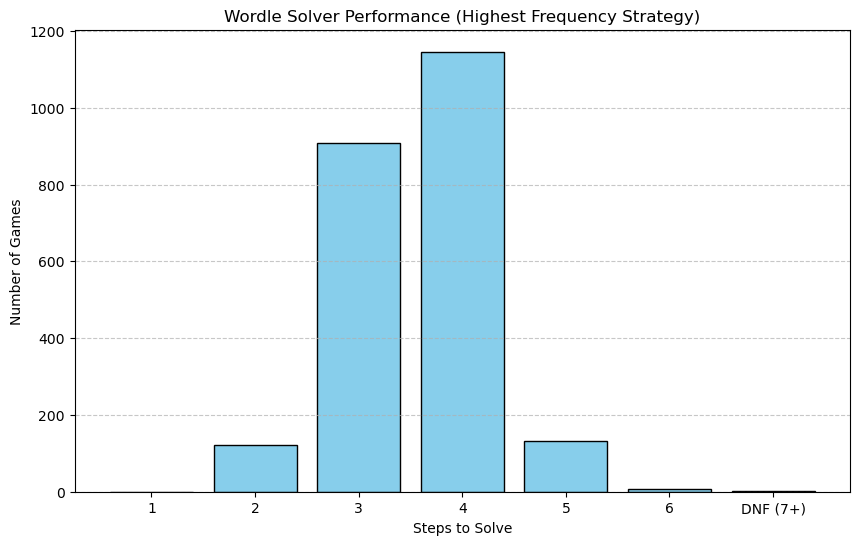

In [1]:
import main as gameEngine
import matplotlib.pyplot as plt
import numpy as np
import time
import math # gameEngine uses math, so it's good to have

# Ensure matplotlib plots are shown inline in the notebook
%matplotlib inline

# This function is a silent version of the solver, designed to return only the step count
def solve_specific_word_for_stats(target_word, game_engine, initial_word_list):
    """Solves for a target word and returns the number of steps (7 for DNF)."""
    available_words = initial_word_list[:] # Use a fresh copy
    steps = 0

    # --- First Guess ---
    guess = "salet"
    steps = 1
    if guess == target_word:
        return steps
    available_words = game_engine.filter_words(available_words, guess, target_word)
    if target_word not in available_words and len(available_words) > 0:
         # This check is for debugging the filter_words logic, if needed
         # print(f"Warning: Target {target_word} filtered out by {guess}")
         pass

    # --- Subsequent Guesses (Loop) ---
    for j in range(5): # Max 5 more guesses (total 6)
        if not available_words:
             return 7 # DNF (ran out of words)

        if len(available_words) == 1:
            guess = available_words[0]
        elif game_engine.isBlimp(available_words):
            # print(f"Blimp detected for {target_word} with list: {available_words}")
            guess = game_engine.blimpSearch(available_words)
        else:
            guess = game_engine.getMaxValue1(available_words)

        steps += 1
        if guess == target_word:
            return steps

        available_words = game_engine.filter_words(available_words, guess, target_word)
        if target_word not in available_words and len(available_words) > 0:
            # print(f"Warning: Target {target_word} filtered out by {guess}")
            pass

    # --- End of Loop ---
    # If it exits the loop, it failed in 6 steps
    return 7 # DNF (6 guesses used, no match)


# --- Main Execution ---
print("Starting full simulation for all words in words.txt...")
print("This may take several minutes.")

# Load lists
permanent_answers = [i[:-1] for i in open("words.txt", "r").readlines()]
gameEngine.available_words = permanent_answers[:] # Ensure gameEngine has the right list for its functions
gameEngine.permanent_answers = permanent_answers[:]
gameEngine.wordsAllowed = [i[:-1] for i in open("wordsAllowed.txt", "r").readlines()]

results = []
dnf_words = [] # <-- ADDED: List to store failed words
start_time = time.time()
total_words = len(permanent_answers)

for i, word in enumerate(permanent_answers):
    if (i+1) % 200 == 0:
        print(f"... processed {i+1}/{total_words} words ...")
    
    # Pass the full list so the function can make a fresh copy
    steps = solve_specific_word_for_stats(word, gameEngine, permanent_answers)
    results.append(steps)
    
    if steps == 7: # <-- ADDED: Check for DNF
        dnf_words.append(word)
            
end_time = time.time()
print(f"\nSimulation complete. Processed {total_words} words in {end_time - start_time:.2f} seconds.")
# --- Analysis & Plotting ---
print("Generating histogram...")

results_array = np.array(results)

# Get counts for 1-6 steps and DNF (7)
success_games = results_array[results_array <= 6]
dnf_count = np.count_nonzero(results_array == 7)
total_games = len(results_array)

if total_games > 0:
    success_rate = len(success_games) / total_games
    avg_steps = np.mean(success_games) if len(success_games) > 0 else 0
    
    print(f"--- Overall Stats ---")
    print(f"Total Games: {total_games}")
    print(f"Success Rate: {success_rate * 100:.2f}%")
    print(f"Failed Games (DNF): {dnf_count}")
    print(f"Average Steps (on success): {avg_steps:.4f}")
    if dnf_count > 0: # <-- ADDED: Print the list of failed words
        print(f"Failed Words: {', '.join(dnf_words)}")
    # Print distribution
    print("\nDistribution of Guesses:")
    for i in range(1, 8):
        count = np.count_nonzero(results_array == i)
        label = f"DNF (7)" if i == 7 else f"{i} Steps"
        print(f"  {label}: {count} games")

# Create the histogram
# Bins: 1, 2, 3, 4, 5, 6, 7 (DNF)
# We want bins centered on the integers. 
bins = np.arange(1, 9) # Edges are 1, 2, 3, 4, 5, 6, 7, 8

plt.figure(figsize=(10, 6))
plt.hist(results_array, bins=bins, align='left', edgecolor='black', rwidth=0.8, color='skyblue')

plt.title('Wordle Solver Performance (Highest Frequency Strategy)')
plt.xlabel('Steps to Solve')
plt.ylabel('Number of Games')

# Set x-ticks to be meaningful
tick_labels = [str(i) for i in range(1, 7)] + ['DNF (7+)']
plt.xticks(ticks=np.arange(1, 8), labels=tick_labels)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
